# **Most Polluted Cities and Countries (IQAir Index)**

```
🚨 Dataset gives the IQAir index for most polluted cities from (2017-2021) 🚨

📌 https://www.iqair.com/ 📌 
```

# **About Dataset**

Air pollution is `the contamination of air due to the presence of substances in the atmosphere that are harmful to the health of humans and other living beings, or cause damage to the climate or to materials. `

There are many different types of air pollutants, such as 

* `gases` (including ammonia, carbon monoxide, sulfur dioxide, nitrous oxides, methane, carbon dioxide and chlorofluorocarbons), 
* `particulates` (both organic and inorganic), and 
* `biological molecules`. 

> Air pollution can cause diseases, allergies, and even death to humans; 

> It can also cause harm to other living organisms such as animals and food crops, and may damage the natural environment (for example, climate change, ozone depletion or habitat degradation) or built environment (for example, acid rain). 

Both human activity and natural processes can generate air pollution.


dataset is scrapped from the [IQAir website](https://www.iqair.com/).

almost 6k most polluted cities are covered in it.

All values are average.



# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
!pip install squarify
import squarify as sq

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15, 8)})

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [6]:
aqi = {
    "index":["0-50", "51-100", "101-150", "151-200", "201-300", "301-500"],
    "category":["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]
}
pd.DataFrame(aqi)

,index,category
0,0-50,Good
1,51-100,Moderate
2,101-150,Unhealthy for Sensitive Groups
3,151-200,Unhealthy
4,201-300,Very Unhealthy
5,301-500,Hazardous


## **AIR QUALITY INDEX (by cities)**

In [7]:
# df_aqicty = pd.read_csv("/content/AIR QUALITY INDEX (by cities) - IQAir.csv")
df_aqicty = pd.read_csv("https://drive.google.com/uc?id=16Dc9poJ_u5eLvTifek4EOvhVm7dnE39Y")
df_aqicty.head()

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,-
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,-,-,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,-,-,-,-


### **Explore Datasets**

In [8]:
print("AIR QUALITY INDEX (by cities)")
print('Total rows:', df_aqicty.shape[0])
print('Total features\columns:', df_aqicty.shape[1])

AIR QUALITY INDEX (by cities)
Total rows: 6475
Total features\columns: 19


In [9]:
print("AIR QUALITY INDEX (by cities)")
print(df_aqicty.columns)

AIR QUALITY INDEX (by cities)
Index(['Rank', 'City', '2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)',
       'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)',
       'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019',
       '2018', '2017'],
      dtype='object')


In [10]:
# get the info of each columns
df_aqicty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6475 entries, 0 to 6474
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       6475 non-null   int64  
 1   City       6475 non-null   object 
 2   2021       6475 non-null   float64
 3   JAN(2021)  6475 non-null   object 
 4   FEB(2021)  6475 non-null   object 
 5   MAR(2021)  6475 non-null   object 
 6   APR(2021)  6475 non-null   object 
 7   MAY(2021)  6475 non-null   object 
 8   JUN(2021)  6475 non-null   object 
 9   JUL(2021)  6475 non-null   object 
 10  AUG(2021)  6475 non-null   object 
 11  SEP(2021)  6475 non-null   object 
 12  OCT(2021)  6475 non-null   object 
 13  NOV(2021)  6475 non-null   object 
 14  DEC(2021)  6475 non-null   object 
 15  2020       6475 non-null   object 
 16  2019       6475 non-null   object 
 17  2018       6475 non-null   object 
 18  2017       6475 non-null   object 
dtypes: float64(1), int64(1), object(17)
memory usage

In [11]:
#Checking number of unique rows in each feature

nu = df_aqicty.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0;  #numerical & categorical features

for i in range(df_aqicty.shape[1]):
    if nu.values[i]<=16:
      cf.append(nu.index[i])
      ncf+=1
    else: 
      nf.append(nu.index[i])
      nnf+=1

print('\n\033[1mConclusion:\033[0m The dataset consists of {} numerical & {} categorical columns.'.format(nnf,ncf))


Conclusion: The dataset consists of 19 numerical & 0 categorical columns.


### **Missing Value**

In [12]:
# replace - with NaN
df_aqicty = df_aqicty.replace("-", np.nan)

In [13]:
df_aqicty.isnull().any()

Rank         False
City         False
2021         False
JAN(2021)     True
FEB(2021)     True
MAR(2021)     True
APR(2021)     True
MAY(2021)     True
JUN(2021)     True
JUL(2021)     True
AUG(2021)     True
SEP(2021)     True
OCT(2021)     True
NOV(2021)     True
DEC(2021)     True
2020          True
2019          True
2018          True
2017          True
dtype: bool

In [14]:
df_aqicty.isna().sum()

Rank            0
City            0
2021            0
JAN(2021)     671
FEB(2021)     574
MAR(2021)     193
APR(2021)     256
MAY(2021)      16
JUN(2021)      16
JUL(2021)      22
AUG(2021)       9
SEP(2021)      17
OCT(2021)      26
NOV(2021)      43
DEC(2021)      87
2020         2207
2019         2422
2018         3999
2017         4194
dtype: int64

In [15]:
#Check for empty elements
nvc = pd.DataFrame(df_aqicty.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_aqicty.shape[0])*100
print(nvc)

           Total Null Values  Percentage
Rank                       0    0.000000
City                       0    0.000000
2021                       0    0.000000
AUG(2021)                  9    0.138996
JUN(2021)                 16    0.247104
MAY(2021)                 16    0.247104
SEP(2021)                 17    0.262548
JUL(2021)                 22    0.339768
OCT(2021)                 26    0.401544
NOV(2021)                 43    0.664093
DEC(2021)                 87    1.343629
MAR(2021)                193    2.980695
APR(2021)                256    3.953668
FEB(2021)                574    8.864865
JAN(2021)                671   10.362934
2020                    2207   34.084942
2019                    2422   37.405405
2018                    3999   61.760618
2017                    4194   64.772201


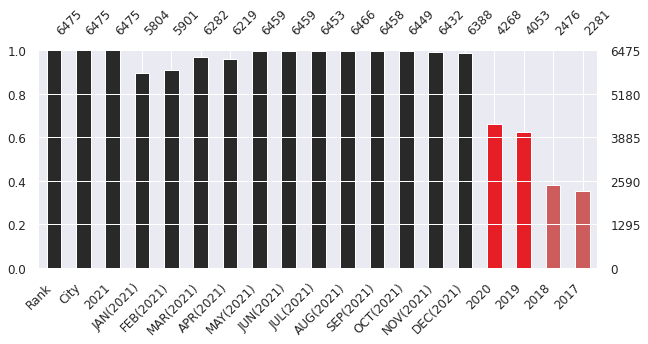

In [16]:
# Creating Visualizations for Missing Value
mv = pd.DataFrame({
    "Missing Value" : df_aqicty.isna().sum(),
    "color" : pd.cut(df_aqicty.isna().sum(), bins=4, labels=["#292929","#B12025","#E61E25","indianred"])
})
missingno.bar(df_aqicty, fontsize =12, color = mv["color"], figsize = (10,4))
plt.show()

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_aqicty.iloc[:, 2:19] = imputer.fit_transform(df_aqicty.iloc[:, 2:19])

### **Duplicate Value**

Tidak ada data duplicate

In [18]:
df_aqicty.duplicated().sum()

0

In [19]:
df_aqicty.describe()

,Rank,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
count,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000
mean,3238.000000,14.102409,18.331266,17.217475,15.602471,12.755521,10.582680,11.218919,12.661529,14.795707,12.001066,12.005498,15.740402,16.636309,14.140857,14.427583,15.872556,16.473969
std,1869.315828,10.679395,20.772865,17.428698,16.071893,10.896384,9.767198,8.035775,8.669215,13.798719,8.012287,10.663255,18.984946,18.771464,10.758745,11.893586,13.778880,15.475838
min,1.000000,1.500000,0.600000,1.400000,1.000000,1.000000,1.000000,1.000000,1.500000,1.600000,1.500000,1.500000,1.100000,1.200000,2.200000,1.900000,2.200000,1.300000
25%,1619.500000,8.200000,8.000000,7.400000,6.900000,6.500000,5.200000,6.700000,7.500000,7.500000,7.300000,6.300000,7.100000,7.200000,8.250000,7.700000,8.400000,8.400000
50%,3238.000000,10.700000,11.400000,11.600000,10.500000,9.500000,8.100000,9.400000,10.500000,11.100000,10.100000,8.700000,10.400000,10.700000,10.400000,10.600000,11.350000,11.200000
75%,4856.500000,15.900000,18.600000,19.700000,16.900000,14.200000,11.800000,12.800000,15.400000,16.600000,14.100000,13.300000,17.700000,17.800000,16.100000,15.625000,17.500000,17.200000
max,6475.000000,106.200000,225.000000,227.100000,189.100000,125.700000,296.600000,127.300000,197.300000,246.600000,110.800000,126.100000,275.000000,241.700000,110.200000,110.200000,135.800000,145.600000


### **Data Preparation**

In [20]:
# round decimals
num_cols = [i for i in df_aqicty.columns if i not in ['Rank', 'City', 'country', 'city_only']]

for i in num_cols:
  df_aqicty[i] = df_aqicty[i].round(decimals = 2)

In [21]:
# split country and city
df_aqicty['temp'] = df_aqicty['City'].str.split(",")
df_aqicty['country'] = df_aqicty['temp'].apply(lambda x : x[1].strip())
df_aqicty['city_only'] = df_aqicty['temp'].apply(lambda x : x[0].strip())
df_aqicty.drop('temp', axis=1, inplace=True)
df_aqicty.head()

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017,country,city_only
0,1,"Bhiwadi, India",106.2,145.80,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.40,125.40,134.3,India,Bhiwadi
1,2,"Ghaziabad, India",102.0,199.90,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.20,135.20,144.6,India,Ghaziabad
2,3,"Hotan, China",101.5,89.35,92.5,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.10,116.00,91.9,China,Hotan
3,4,"Delhi, India",96.4,183.70,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.60,113.50,108.2,India,Delhi
4,5,"Jaunpur, India",95.3,182.20,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,81.4,98.15,118.55,121.1,India,Jaunpur


In [22]:
df_aqicty.columns

Index(['Rank', 'City', '2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)',
       'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)',
       'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019',
       '2018', '2017', 'country', 'city_only'],
      dtype='object')

In [23]:
# change multiple data types of ct to numeric/ float64
df_aqicty.iloc[:, 3:19] = df_aqicty.iloc[:, 3:19].astype("float64")

In [24]:
df_aqicty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6475 entries, 0 to 6474
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       6475 non-null   int64  
 1   City       6475 non-null   object 
 2   2021       6475 non-null   float64
 3   JAN(2021)  6475 non-null   float64
 4   FEB(2021)  6475 non-null   float64
 5   MAR(2021)  6475 non-null   float64
 6   APR(2021)  6475 non-null   float64
 7   MAY(2021)  6475 non-null   float64
 8   JUN(2021)  6475 non-null   float64
 9   JUL(2021)  6475 non-null   float64
 10  AUG(2021)  6475 non-null   float64
 11  SEP(2021)  6475 non-null   float64
 12  OCT(2021)  6475 non-null   float64
 13  NOV(2021)  6475 non-null   float64
 14  DEC(2021)  6475 non-null   float64
 15  2020       6475 non-null   float64
 16  2019       6475 non-null   float64
 17  2018       6475 non-null   float64
 18  2017       6475 non-null   float64
 19  country    6475 non-null   object 
 20  city_onl

## **AIR QUALITY INDEX (top countries)**

In [25]:
# df_aqitpcr = pd.read_csv("/content/AIR QUALITY INDEX- top countries.csv")
df_aqitpcr = pd.read_csv("https://drive.google.com/uc?id=151YbNiP47fH0eJS6lTDmilTFoqmsYrmu")
df_aqitpcr.head()

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383"
1,2,Chad,75.9,-,-,-,"16,425,859"
2,3,Pakistan,66.8,59,65.8,74.3,"220,892,331"
3,4,Tajikistan,59.4,30.9,-,-,"9,537,642"
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385"


### **Explore Datasets**

In [26]:
print("AIR QUALITY INDEX (top countries)")
print('Total rows:', df_aqitpcr.shape[0])
print('Total features\columns:', df_aqitpcr.shape[1])

AIR QUALITY INDEX (top countries)
Total rows: 118
Total features\columns: 7


In [27]:
print("AIR QUALITY INDEX (top countries)")
print(df_aqitpcr.columns)

AIR QUALITY INDEX (top countries)
Index(['Rank', 'Country/Region', '2021', '2020', '2019', '2018', 'Population'], dtype='object')


In [28]:
# get the info of each columns
df_aqitpcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            118 non-null    int64  
 1   Country/Region  118 non-null    object 
 2   2021            118 non-null    float64
 3   2020            118 non-null    object 
 4   2019            118 non-null    object 
 5   2018            118 non-null    object 
 6   Population      118 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.6+ KB


In [29]:
#Checking number of unique rows in each feature

nu = df_aqitpcr.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0;  #numerical & categorical features

for i in range(df_aqitpcr.shape[1]):
    if nu.values[i]<=16:
      cf.append(nu.index[i])
      ncf+=1
    else: 
      nf.append(nu.index[i])
      nnf+=1

print('\n\033[1mConclusion:\033[0m The dataset consists of {} numerical & {} categorical columns.'.format(nnf,ncf))


Conclusion: The dataset consists of 7 numerical & 0 categorical columns.


### **Missing Value**

In [30]:
# replace - with NaN
df_aqitpcr = df_aqitpcr.replace("-", np.nan)

In [31]:
df_aqitpcr.isnull().any()

Rank              False
Country/Region    False
2021              False
2020               True
2019               True
2018               True
Population        False
dtype: bool

In [32]:
df_aqitpcr.isna().sum()

Rank               0
Country/Region     0
2021               0
2020              17
2019              27
2018              46
Population         0
dtype: int64

In [33]:
#Check for empty elements
nvc = pd.DataFrame(df_aqitpcr.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_aqitpcr.shape[0])*100
print(nvc)

                Total Null Values  Percentage
Rank                            0    0.000000
Country/Region                  0    0.000000
2021                            0    0.000000
Population                      0    0.000000
2020                           17   14.406780
2019                           27   22.881356
2018                           46   38.983051


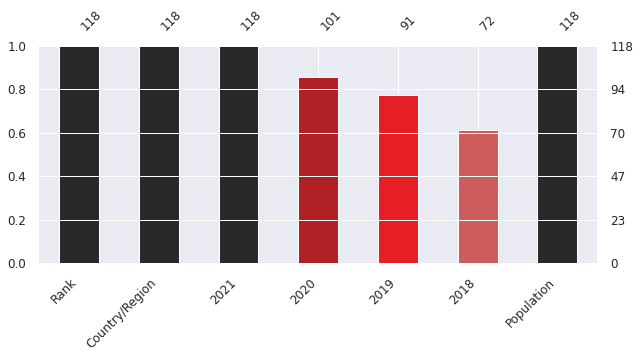

In [34]:
# Creating Visualizations for Missing Value
mv = pd.DataFrame({
    "Missing Value" : df_aqitpcr.isna().sum(),
    "color" : pd.cut(df_aqitpcr.isna().sum(), bins=4, labels=["#292929","#B12025","#E61E25","indianred"])
})
missingno.bar(df_aqitpcr, fontsize =12, color = mv["color"], figsize = (10,4))
plt.show()

### **Duplicate Value**

Tidak ada data duplicate

In [35]:
df_aqitpcr.duplicated().sum()

0

In [36]:
df_aqitpcr.describe()

,Rank,2021
count,118.000000,118.000000
mean,59.500000,21.027119
std,34.207699,15.023336
min,1.000000,3.800000
25%,30.250000,10.725000
50%,59.500000,16.750000
75%,88.750000,25.900000
max,118.000000,76.900000


### **Data Preparation**

In [37]:
df_aqitpcr.columns

Index(['Rank', 'Country/Region', '2021', '2020', '2019', '2018', 'Population'], dtype='object')

In [38]:
# change multiple data types of ct to numeric/ float64
df_aqitpcr.iloc[:, 3:6] = df_aqitpcr.iloc[:, 3:6].astype("float64")
df_aqitpcr.loc[:, "Population"] = df_aqitpcr["Population"].apply(lambda x: x.replace(",", ""))
df_aqitpcr.iloc[:, 6] = df_aqitpcr.iloc[:, 6].astype("int64")

In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_aqitpcr.iloc[:, 2:6] = imputer.fit_transform(df_aqitpcr.iloc[:, 2:6])

In [40]:
# round decimals
num_cols = [i for i in df_aqitpcr.columns if i not in ['Rank', 'Country/Region', 'Population']]

for i in num_cols:
  df_aqitpcr[i] = df_aqitpcr[i].round(decimals = 2)

In [41]:
df_aqitpcr.head()

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.10,83.30,97.10,164689383
1,2,Chad,75.9,68.05,74.55,85.70,16425859
2,3,Pakistan,66.8,59.00,65.80,74.30,220892331
3,4,Tajikistan,59.4,30.90,40.00,56.95,9537642
4,5,India,58.1,51.90,58.10,72.50,1380004385


In [42]:
df_aqitpcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            118 non-null    int64  
 1   Country/Region  118 non-null    object 
 2   2021            118 non-null    float64
 3   2020            118 non-null    float64
 4   2019            118 non-null    float64
 5   2018            118 non-null    float64
 6   Population      118 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 6.6+ KB


## **Save Data Clean**

In [43]:
df_aqicty.reset_index(inplace = True, drop = True)
df_aqitpcr.reset_index(inplace = True, drop = True)

In [44]:
df_aqicty.to_csv('Clean - AIR QUALITY INDEX (by cities).csv', index=False)
df_aqicty.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Science   Data Analyst/DQLab Tetris Program 2.0/Capstone Project/Data/Most Polluted Cities and Countries (IQAir Index)/Clean - AIR QUALITY INDEX (by cities).csv', index=False)

In [45]:
df_aqitpcr.to_csv('Clean - AIR QUALITY INDEX- top countries.csv', index=False)
df_aqitpcr.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Science   Data Analyst/DQLab Tetris Program 2.0/Capstone Project/Data/Most Polluted Cities and Countries (IQAir Index)/Clean - AIR QUALITY INDEX- top countries.csv', index=False)

# **Exploratory Data Analysis**

In [63]:
top_10_country = df_aqitpcr.head(20).copy()
top_10_country['Rank_new'] = 21-top_10_country['Rank']
fig1= px.bar(top_10_country, y='Country/Region', 
             x='Rank_new', color='2021',
             title="Top 20 Polluted Country In World",
             text='2021',
             hover_data={'Rank_new':False, 'Rank':True, 'Population':True},
             height=700)
fig1.layout.plot_bgcolor = "white"
fig1.add_vline(x=13.1, line_width=3, line_dash="dash", line_color="green", annotation_text="Threshold Good")
fig1.update_xaxes(visible=False, showticklabels=False)
fig1.show()

It can be seen that Indonesia has a 17th Rating with an AQI (Air Quality Index) value of 34.3 so it is considered Good.

In [79]:
top_10_country = df_aqitpcr.head(17).copy().iloc[11:18,:]
top_10_country['Rank'] = 18-top_10_country['Rank']

# Deleting unnecesary Columns
top_10_country.drop(['Population'], axis=1, inplace=True)

# Converting wide to long format
top_10_country = top_10_country.melt(id_vars=['Rank', 'Country/Region'],
                               var_name="Year", 
                               value_name="AQI")
                               
top_10_country.sort_values(['Rank','Year'], ascending=[False, True], inplace=True)
top_10_country['AQI'] = top_10_country['AQI'].astype(float)


# For Plotting purose filling missing values with the backfill process
top_10_country.fillna(method="bfill", inplace=True)

fig2= px.line(top_10_country, y='AQI', 
              x='Year',
              color='Country/Region',
             title="Top 11-17 Yearly Air Quality Index", 
              symbol='Country/Region',
              text="AQI")
fig2.for_each_trace(lambda t: t.update(textfont_color="black", textposition='top right'))
fig2.layout.plot_bgcolor = "light grey"
fig2.add_hrect(y0=23, y1=50,
              annotation_text="Good", annotation_position="top left",
              fillcolor="green", opacity=0.15, line_width=0)
fig2.update_yaxes(visible=False, showticklabels=False, )
fig2.show()

The value of AQI (Air Quality Index) in Indonesia in **2018** was 42
Then it rose 9.7 in 2019 by 51.7
And down in 2020 and 2021 maybe because of the number of vehicles and the process of activity during Covid-19.

In [80]:
top_10_country = df_aqitpcr.head(17).copy().iloc[11:18,:]
top_10_country['Rank'] = 18-top_10_country['Rank']

# Deleting unnecesary Columns
top_10_country.drop(['Population'], axis=1, inplace=True)

# Converting wide to long format
top_10_country = top_10_country.melt(id_vars=['Rank', 'Country/Region'],
                               var_name="Year", 
                               value_name="AQI")
                               
top_10_country.sort_values(['Rank','Year'], ascending=[False, True], inplace=True)
top_10_country['AQI'] = top_10_country['AQI'].astype(float)


# For Plotting purose filling missing values with the backfill process
top_10_country.fillna(method="bfill", inplace=True)

colors = top_10_country['Country/Region'].apply(lambda x: 'crimson' if x == "Indonesia" else 'lightslategray')

fig2= px.line(top_10_country, y='AQI', 
              x='Year',
              color=list(colors.values),
             title="Top 11-17 Yearly Air Quality Index (Indonesia)", 
              text="AQI",
              symbol='Country/Region')
fig2.layout.plot_bgcolor = "light grey"

fig2.update_traces(textposition="top right")
fig2.update(layout_showlegend=False)
# fig2.update_layout(margin=dict(t=40, b=10))
fig2.update_yaxes(visible=False, showticklabels=False, )
fig2.show()

In [81]:
df_aqitpcr

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.10,83.30,97.10,164689383
1,2,Chad,75.9,68.05,74.55,85.70,16425859
2,3,Pakistan,66.8,59.00,65.80,74.30,220892331
3,4,Tajikistan,59.4,30.90,40.00,56.95,9537642
4,5,India,58.1,51.90,58.10,72.50,1380004385
...,...,...,...,...,...,...,...
113,114,"Bonaire, Saint Eustatius and Saba",5.1,4.35,7.90,10.15,26221
114,115,Cape Verde,5.1,4.35,7.90,10.15,555988
115,116,Puerto Rico,4.8,3.70,10.20,13.70,2860840
116,117,U.S. Virgin Islands,4.5,3.70,3.50,6.90,104423


In [82]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.1f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

In [83]:
top_10_country = df_aqitpcr.sort_values(['Population'], ascending=False).head(10).copy()
top_10_country["text"] = top_10_country["Population"].apply(lambda x: human_format(x))
fig1= px.bar(top_10_country, 
             x="Country/Region",
             y="Population", 
             color='Country/Region',
             text="text",
             title="Top 10 Population Country In World")
fig1.layout.plot_bgcolor = "white"
fig1.show()

The total population in Indonesia ranks 4th:
* China = 1.4B
* India = 1.4B
* USA = 331M
* **Indonesia 273.5M**

The population of Indonesia has increased from time to time. The increase in population has a negative impact on the environment. the availability of green land as a source of clean air in urban areas is also reduced due to the many existing green lands being converted as settlements. Thus it can be said that an increase in population can lead to reduced availability of clean air. The reduced availability of clean air can also be caused by air pollution due to motor vehicle fumes.

# **Get Indonesia Data**

In [84]:
df_aqicty.head(2)

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017,country,city_only
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,134.3,India,Bhiwadi
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6,India,Ghaziabad


In [85]:
# select city in Indonesia
df_aqicty_indo = df_aqicty.loc[df_aqicty['country'] == 'Indonesia'].reset_index(drop=True)
df_aqicty_indo.head()

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017,country,city_only
0,239,"Jakarta, Indonesia",39.2,27.9,24.3,36.2,41.0,45.3,54.5,57.2,46.4,39.8,43.5,23.8,29.7,39.6,49.40,45.30,29.70,Indonesia,Jakarta
1,328,"Surabaya, Indonesia",34.8,24.5,25.2,41.9,38.9,32.4,37.2,38.6,32.9,27.7,42.9,41.6,24.1,33.4,40.60,47.25,37.25,Indonesia,Surabaya
2,372,"Bandung, Indonesia",33.4,19.6,21.1,32.6,35.0,39.3,42.0,39.0,33.5,29.6,41.7,29.1,34.7,33.2,30.35,47.25,38.25,Indonesia,Bandung
3,522,"Semarang, Indonesia",28.6,23.2,16.2,31.7,26.5,25.9,22.3,39.3,27.7,26.2,35.6,31.8,32.8,28.5,16.75,23.20,33.25,Indonesia,Semarang
4,632,"Palembang, Indonesia",26.0,25.6,29.3,27.6,30.5,23.6,25.6,24.5,23.4,23.1,34.4,24.1,22.0,23.4,20.15,22.75,19.75,Indonesia,Palembang


In [86]:
df_aqitpcr.head(2)

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.10,83.30,97.1,164689383
1,2,Chad,75.9,68.05,74.55,85.7,16425859


In [87]:
# select country = Indonesia
df_aqitpcr_indo = df_aqitpcr.loc[df_aqitpcr['Country/Region'] == "Indonesia"].reset_index(drop=True)
df_aqitpcr_indo

,Rank,Country/Region,2021,2020,2019,2018,Population
0,17,Indonesia,34.3,40.7,51.7,42.0,273523621


# **Exploratory Data Analysis (Indo)**

In [88]:
# find unique list in row city_only
df_aqicty_indo['city_only'].unique()

array(['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Palembang', 'Duri',
       'Bangkinang', 'Balaipungut', 'Pontianak', 'Dumai', 'Jambi',
       'Pekanbaru', 'Sedinginan', 'Ubud', 'Semarapura', 'Serang',
       'Denpasar', 'Bogor', 'Jimbaran', 'Makassar', 'Cirebon', 'Kuta',
       'Palangkaraya', 'Banda Aceh', 'Kayu Agung', 'Samarinda',
       'Indralaya'], dtype=object)

In [89]:
# bar plot using plotly express
df_aqicty_indo_bar = df_aqicty_indo.copy()
fig = px.bar(df_aqicty_indo_bar, 
             x = 'city_only',
             y = '2021', 
             labels = {'city_only': 'City'}, 
             color = '2021', 
             text = '2021',
             title = "Indonesia Average Air Quality Index by City",
)

# plot background white
fig.layout.plot_bgcolor = "white"
fig.show()

In [90]:
import plotly.graph_objects as go
labels = df_aqicty_indo_bar['city_only']
fig = go.Figure(data=[
    go.Bar(name="2021", x=labels, y=df_aqicty_indo_bar['2021'], text=df_aqicty_indo_bar['2021']),
    go.Bar(name="2020", x=labels, y=df_aqicty_indo_bar['2020'], text=df_aqicty_indo_bar['2020']),
    go.Bar(name="2019", x=labels, y=df_aqicty_indo_bar['2019'], text=df_aqicty_indo_bar['2019'])
])

# Change the bar mode
fig.update_layout(title_text='Indonesia Average Air Quality Index by City (3 Years)')
# fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_layout(barmode='stack')
fig.show()

Keypoints

* Overall, air pollution has gone down in the last 4 years being year 2021 to be the lowest 

* Jakarta has highest average AQI score with 39.2 

* Indralaya in South Sumatra has lowest score with 4.2 

* 4 out of 5 highest polluted cities is in Java 

* Lowest 5 polluted cities located in Sumatra and Kalimantan Many cities have around 15-25 AQI score

In [91]:
# line plot with plotly express
df_aqicty_indo_line = df_aqicty_indo.copy()

# dropping unused columns
df_aqicty_indo_line.drop(['2021', '2020', '2019', '2018', '2017', 'country', 'city_only'],
                 axis=1, inplace=True)

# converting wide to long format
df_aqicty_indo_line = df_aqicty_indo_line.melt(id_vars = ['Rank', 'City'],
                               var_name = "Month", 
                               value_name = "Air Quality Index")

# filling missing values with the backfill process
df_aqicty_indo_line.fillna(method="bfill", inplace=True)

fig= px.line(df_aqicty_indo_line, y = 'Air Quality Index', 
             labels = { 'Air Quality Index': 'AQI'}, 
              x = 'Month', color = 'City',
             title = "Monthly Air Quality Index 2021")
fig.layout.plot_bgcolor = "light grey"
fig.show()

Keypoints

* Jakarta have overall high AQI with highest on July with 57.2

* Pontianak has staggering rise of 86.2 AQI on November yet followed by inverse effect in cities like Bandung, Jakarta, Serang, and Jambi

* Indralaya experienced healthy fall of AQI after March by almost 40 points